- 코로나와 정책발표의 관계를 날짜별로 알아보고자 함
- 코로나와 주가의 상관관계를 날짜별로 알아보고자 함

- 주제: 코로나가 사회, 문화, 경제, 정치, 교통 등등 우리 삶의 얼마나 영향을 끼쳤는지

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

data_dic = { 
            'policy_public':['02-18','02-18','02-25','02-28','02-28','03-01','03-03','03-03','03-10','03-11','03-11','03-13',
                             '03-13','03-20','03-23','03-24','03-24','03-27','03-31','04-01','04-01','04-01','04-01','04-02',
                             '04-02','04-03','04-03','04-03','04-06','04-06','04-07','04-07','04-08','04-13','04-13'],
            'policy_vulnerable':['03-11','04-02','04-02','04-09','04-13'],
            'policy_business': ['02-10','02-18','02-21','02-21','02-25','02-25','02-25','02-25','02-27','02-27','02-27','02-28',
                                '02-28','02-28','02-28','02-28','03-01','03-01','03-01','03-01','03-02','03-02','03-02','03-02',
                                '03-02','03-03','03-04','03-05','03-05','03-09','03-09','03-11','03-11','03-11','03-13','03-18',
                                '03-18','03-18','03-20','03-20','03-20','03-20','03-20','03-20','03-20','03-20','03-23','03-24',
                                '03-24','03-25','03-25','03-26','03-26','03-26','03-26','03-26','03-27','03-27','03-30','03-31',
                                '03-31','04-01','04-02','04-02','04-02','04-02','04-08','04-09','04-09','04-09','04-10','04-10',
                                '04-13','04-13','04-14'],
            'policy_hospital':['02-21','03-04','03-20'],
            'policy_area':['02-06','02-19','02-28','03-02','03-03','03-23','03-24','03-25'],
            'etc':[]
            
            }
policy_data = pd.DataFrame(data_dic)

# 코로나와 정책의 관계

In [18]:
path = 'C:/Users/tkdal/Desktop/covid19/dataset/'

time_policy = pd.read_csv(path+'TimePolicy.csv')

time_policy

,date,time,test,negative,confirmed,released,deceased,policy_public,policy_vulnerable,policy_business,policy_hospital,policy_area,policy_etc
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
82,2020-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2020-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN


In [20]:
time_policy['day_confirmed']=time_policy['confirmed']
for i in range(1,len(time_policy)):
    time_policy.loc[i,'day_confirmed']=time_policy.loc[i,'confirmed']-time_policy.loc[i-1,'confirmed']

time_policy

,date,time,test,negative,confirmed,released,deceased,policy_public,policy_vulnerable,policy_business,policy_hospital,policy_area,policy_etc,day_confirmed
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
82,2020-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2020-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN


In [22]:
time_policy = time_policy.fillna(0)
time_policy['policy'] = time_policy['policy_public'] + time_policy['policy_vulnerable'] + time_policy['policy_business'] + time_policy['policy_hospital'] + time_policy['policy_area']

time_policy

,date,time,test,negative,confirmed,released,deceased,policy_public,policy_vulnerable,policy_business,policy_hospital,policy_area,policy_etc,day_confirmed,policy
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-04-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
82,2020-04-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,2020-04-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,2020-04-13,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0


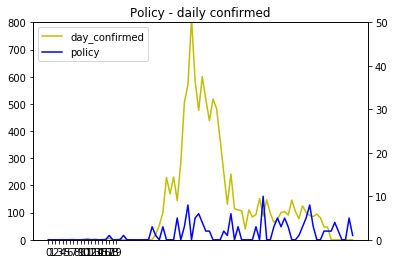

In [230]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(time_policy['date']))

line1 = ax1.plot(x, time_policy['day_confirmed'], color = 'y', label = 'day_confirmed')
line2 = ax2.plot(x, time_policy['policy'], color = 'b', label = 'policy')

plt.xticks(np.arange(0,20))

ax1.set_ylim(0,800)
ax2.set_ylim(0,50)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc = 2)



plt.title('Policy - daily confirmed')

plt.show()


# 코로나와 주식의 관계

In [209]:
path = 'C:/Users/tkdal/Desktop/covid19/dataset/'

kospi = pd.read_csv(path+'kospi3.csv')
kospi

,date,kospi,open,high,low,volumn,rate
0,2020-04-14,1857,1846,1864,1837,872.12K,0.02
1,2020-04-13,1826,1853,1853,1826,1.01M,-0.02
2,2020-04-10,1861,1836,1861,1824,992.55M,0.01
3,2020-04-09,1836,1838,1839,1818,920.57M,0.02
4,2020-04-08,1807,1816,1842,1802,907.49M,-0.01
...,...,...,...,...,...,...,...
87,2019-12-06,2082,2072,2084,2070,440.19M,0.01
88,2019-12-05,2061,2078,2084,2054,472.19M,0.00
89,2019-12-04,2069,2071,2073,2057,347.00M,-0.01
90,2019-12-03,2084,2075,2086,2067,450.04M,0.00


In [207]:
#kospi.head()
#kospi.rename(columns = {'날짜':'date', '종가':'kospi','거래량':'volume'}, inplace=True)

#kospi

,date,kospi,오픈,고가,저가,volume,변동 %
0,43935,1857,1846,1864,1837,872.12K,0.02
1,43934,1826,1853,1853,1826,1.01M,-0.02
2,43931,1861,1836,1861,1824,992.55M,0.01
3,43930,1836,1838,1839,1818,920.57M,0.02
4,43929,1807,1816,1842,1802,907.49M,-0.01
...,...,...,...,...,...,...,...
87,43805,2082,2072,2084,2070,440.19M,0.01
88,43804,2061,2078,2084,2054,472.19M,0.00
89,43803,2069,2071,2073,2057,347.00M,-0.01
90,43802,2084,2075,2086,2067,450.04M,0.00


In [190]:
#kospi.drop(['오픈','고가','저가'], axis='columns', inplace=True)
#kospi

,date,kospi,volume,변동 %
0,43935,1857,872.12K,0.02
1,43934,1826,1.01M,-0.02
2,43931,1861,992.55M,0.01
3,43930,1836,920.57M,0.02
4,43929,1807,907.49M,-0.01
...,...,...,...,...
87,43805,2082,440.19M,0.01
88,43804,2061,472.19M,0.00
89,43803,2069,347.00M,-0.01
90,43802,2084,450.04M,0.00


In [210]:
kospi

,date,kospi,open,high,low,volumn,rate
0,2020-04-14,1857,1846,1864,1837,872.12K,0.02
1,2020-04-13,1826,1853,1853,1826,1.01M,-0.02
2,2020-04-10,1861,1836,1861,1824,992.55M,0.01
3,2020-04-09,1836,1838,1839,1818,920.57M,0.02
4,2020-04-08,1807,1816,1842,1802,907.49M,-0.01
...,...,...,...,...,...,...,...
87,2019-12-06,2082,2072,2084,2070,440.19M,0.01
88,2019-12-05,2061,2078,2084,2054,472.19M,0.00
89,2019-12-04,2069,2071,2073,2057,347.00M,-0.01
90,2019-12-03,2084,2075,2086,2067,450.04M,0.00


kospi['date'] = kospi['date'].str.replace(pat='년 ', repl='-',regex=False)
kospi['date'] = kospi['date'].str.replace(pat='월 ', repl='-',regex=False)
kospi['date'] = kospi['date'].str.replace(pat='일', repl='',regex=False)

kospi['date'] = kospi['date'].str.rstrip()

In [211]:
kospi.loc[::-1].reset_index(drop=True).head(92)

,date,kospi,open,high,low,volumn,rate
0,2019-12-02,2092,2098,2104,2089,385.34M,0.00
1,2019-12-03,2084,2075,2086,2067,450.04M,0.00
2,2019-12-04,2069,2071,2073,2057,347.00M,-0.01
3,2019-12-05,2061,2078,2084,2054,472.19M,0.00
4,2019-12-06,2082,2072,2084,2070,440.19M,0.01
...,...,...,...,...,...,...,...
87,2020-04-08,1807,1816,1842,1802,907.49M,-0.01
88,2020-04-09,1836,1838,1839,1818,920.57M,0.02
89,2020-04-10,1861,1836,1861,1824,992.55M,0.01
90,2020-04-13,1826,1853,1853,1826,1.01M,-0.02


In [212]:
kospi_confirmed = pd.merge(kospi, time_policy, on='date')
kospi_confirmed

,date,kospi,open,high,low,volumn,rate,time,test,negative,...,released,deceased,policy_public,policy_vulnerable,policy_business,policy_hospital,policy_area,policy_etc,day_confirmed,policy
0,2020-04-14,1857,1846,1864,1837,872.12K,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2020-04-13,1826,1853,1853,1826,1.01M,-0.02,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0
2,2020-04-10,1861,1836,1861,1824,992.55M,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
3,2020-04-09,1836,1838,1839,1818,920.57M,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0
4,2020-04-08,1807,1816,1842,1802,907.49M,-0.01,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
5,2020-04-07,1824,1827,1839,1792,951.74M,0.02,0.0,477304.0,446323.0,...,6694.0,192.0,2.0,0.0,0.0,0.0,0.0,0.0,47.0,2.0
6,2020-04-06,1792,1745,1794,1743,1.22B,0.04,0.0,466804.0,437225.0,...,6598.0,186.0,2.0,0.0,0.0,0.0,0.0,0.0,47.0,2.0
7,2020-04-03,1725,1731,1744,1707,1.00B,0.00,0.0,443273.0,414303.0,...,6021.0,174.0,3.0,0.0,0.0,0.0,0.0,0.0,86.0,3.0
8,2020-04-02,1725,1694,1727,1664,766.31M,0.02,0.0,431743.0,403882.0,...,5828.0,169.0,2.0,2.0,4.0,0.0,0.0,0.0,89.0,8.0
9,2020-04-01,1685,1737,1762,1685,1.24B,-0.04,0.0,421547.0,395075.0,...,5567.0,165.0,4.0,0.0,1.0,0.0,0.0,0.0,101.0,5.0


In [213]:
kospi_confirmed.drop(['time','negative','released','policy_public','policy_vulnerable',
                     'policy_business','policy_hospital','policy_area','policy_etc'], axis='columns', inplace=True)

In [214]:
kospi_confirmed

,date,kospi,open,high,low,volumn,rate,test,confirmed,deceased,day_confirmed,policy
0,2020-04-14,1857,1846,1864,1837,872.12K,0.02,0.0,0.0,0.0,0.0,1.0
1,2020-04-13,1826,1853,1853,1826,1.01M,-0.02,0.0,0.0,0.0,0.0,5.0
2,2020-04-10,1861,1836,1861,1824,992.55M,0.01,0.0,0.0,0.0,0.0,2.0
3,2020-04-09,1836,1838,1839,1818,920.57M,0.02,0.0,0.0,0.0,0.0,4.0
4,2020-04-08,1807,1816,1842,1802,907.49M,-0.01,0.0,0.0,0.0,0.0,2.0
5,2020-04-07,1824,1827,1839,1792,951.74M,0.02,477304.0,10331.0,192.0,47.0,2.0
6,2020-04-06,1792,1745,1794,1743,1.22B,0.04,466804.0,10284.0,186.0,47.0,2.0
7,2020-04-03,1725,1731,1744,1707,1.00B,0.00,443273.0,10062.0,174.0,86.0,3.0
8,2020-04-02,1725,1694,1727,1664,766.31M,0.02,431743.0,9976.0,169.0,89.0,8.0
9,2020-04-01,1685,1737,1762,1685,1.24B,-0.04,421547.0,9887.0,165.0,101.0,5.0


In [215]:
kospi_confirmed = kospi_confirmed.loc[::-1].reset_index(drop=True).head(92)

In [216]:
kospi_confirmed

,date,kospi,open,high,low,volumn,rate,test,confirmed,deceased,day_confirmed,policy
0,2020-01-20,2263,2261,2277,2258,545.49M,0.01,1.0,1.0,0.0,1.0,0.0
1,2020-01-21,2240,2260,2266,2238,770.32M,-0.01,1.0,1.0,0.0,0.0,0.0
2,2020-01-22,2267,2239,2269,2235,608.51M,0.01,4.0,1.0,0.0,0.0,0.0
3,2020-01-23,2246,2255,2261,2242,509.61M,-0.01,22.0,1.0,0.0,0.0,0.0
4,2020-01-28,2177,2192,2200,2166,808.88M,-0.03,116.0,4.0,0.0,0.0,0.0
5,2020-01-29,2185,2188,2195,2172,692.30M,0.00,187.0,4.0,0.0,0.0,0.0
6,2020-01-30,2148,2182,2187,2140,602.84M,-0.02,246.0,6.0,0.0,2.0,0.0
7,2020-01-31,2119,2161,2167,2119,710.51M,-0.01,312.0,11.0,0.0,5.0,0.0
8,2020-02-03,2119,2087,2127,2083,836.70M,0.00,490.0,15.0,0.0,0.0,0.0
9,2020-02-04,2158,2121,2162,2121,624.64M,0.02,607.0,16.0,0.0,1.0,0.0


In [218]:
kospi_confirmed.dtypes

date              object
kospi              int64
open               int64
high               int64
low                int64
volumn            object
rate             float64
test             float64
confirmed        float64
deceased         float64
day_confirmed    float64
policy           float64
dtype: object

#kospi_confirmed['kospi'] = kospi_confirmed.astype({'kospi':'float'}).dtypes
kospi_confirmed.dtypes
kospi['kospi'] = kospi['kospi'].str.replace(pat=',', repl='0',regex=False)

kospi

kospi_confirmed['kospi'] = pd.to_numeric(kospi_confirmed['kospi'])

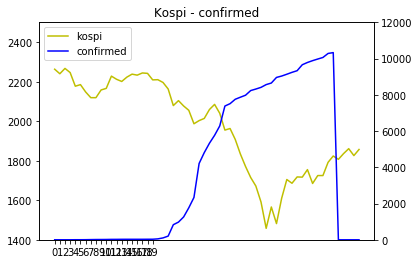

In [227]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(kospi_confirmed['date']))

line1 = ax1.plot(x, kospi_confirmed['kospi'], color = 'y', label = 'kospi')
line2 = ax2.plot(x, kospi_confirmed['confirmed'], color = 'b', label = 'confirmed')

plt.xticks(np.arange(0,20))

ax1.set_ylim(1400,2500)
ax2.set_ylim(0,12000)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc = 2)



plt.title('Kospi - confirmed')

plt.show()

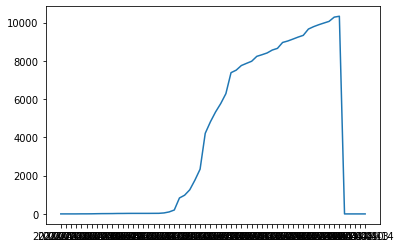

In [224]:
plt.plot(kospi_confirmed['date'],kospi_confirmed['confirmed'])
plt.show()

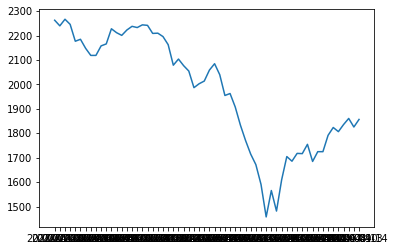

In [225]:
plt.plot(kospi_confirmed['date'],kospi_confirmed['kospi'])
plt.show()

# 확진자 수 - 정책 수 - 주식 주가

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(kospi_confirmed['date']))

line1 = ax1.plot(x, kospi_confirmed['kospi'], color = 'y', label = 'kospi')
line2 = ax2.plot(x, kospi_confirmed['confirmed'], color = 'b', label = 'confirmed')

plt.xticks(np.arange(0,20))

ax1.set_ylim(1400,2500)
ax2.set_ylim(0,12000)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc = 2)



plt.title('Kospi - confirmed')

plt.show()